<a href="https://colab.research.google.com/github/XimeAOSM/Internet-COVID-DS4A/blob/main/FINAL_MODELING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import seaborn               as sns
from scipy import stats

import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
import pandas as pd
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
worksheet = gc.open('joined_using_CopyCovidDeaths').sheet1

wbJoined = worksheet.get_all_values()

df_joined = pd.DataFrame.from_records(wbJoined[1:], columns=wbJoined[0])
df_joined

,date_as_of,start_date,end_date,state,county_name,fips,urban_rural_code,deaths_involving_covid_19,non_covid_deaths,deaths_from_all_causes,census_id,county_state_combo,county,Right_state,region,division,total_households,one_or_more_computing_device,laptop_desktop,laptop_desktop_only,smartphone,smartphone_only,tablet_or_other_device,tablet_or_other_device_only,other_computer,other_computer_only,no_computer,internet_subscription,dialup,broadband_any,broadband_cellular_data,broadband_cellular_data_only,broadband_cfd,broadband_satellite,no_internet,income_low,income_low_dialup,income_low_broadband,income_low_no_internet,income_medium,income_medium_dialup,income_medium_broadband,income_medium_no_internet,income_high,income_high_dialup,income_high_broadband,income_high_no_internet
0,6/9/2021,,6/5/2021,UT,Tooele County,49045,Large fringe metro,0.05094339623,0.9490566038,530,0500000US49045,"Tooele County, UT",Tooele County,UT,West,8,143903,0.1925602663,0.186841136,0.007852511761,0.1811984462,0.001799823492,0.1454938396,0.001195249578,0.004343203408,0,2.45E-03,0.183901656,0.0005281335344,0.1833735224,0.1722479726,0.01035419692,0.1693640855,0.01242503631,0.01110470247,0.1147432646,0.0004183373522,0.08357782673,0.03074710048,0.4477599494,0.001797043842,0.3999054919,0.04605671876,0.6289806328,0.0005086759831,0.6110796856,0.01739227118
1,6/9/2021,1/1/2020,6/5/2021,CO,Broomfield County,8014,Large fringe metro,0.106029106,0.893970894,481,0500000US08014,"Broomfield County, CO",Broomfield County,CO,West,8,171458,0.233299117,0.1998565246,0.00490499131,0.2241598526,0.01370598047,0.1801490744,0.00008165264963,0.004595877708,0,7.95E-03,0.2240140443,0,0.2240140443,0.2195523102,0.0148374529,0.191889559,0.02934829521,0.0172345414,0.1406962638,0.0003406081956,0.08923059875,0.05112505687,0.4214192397,0.0009302569726,0.3509098438,0.06957972215,0.524821239,0.0003452740613,0.5029814882,0.02149447678
2,6/9/2021,1/1/2020,6/5/2021,IL,Kendall County,17093,Large fringe metro,0.02811950791,0.9718804921,569,0500000US17093,"Kendall County, IL",Kendall County,IL,Midwest,3,186364,0.1421197227,0.125136829,0.003010238029,0.1344304694,0.007753643408,0.1114592947,0.001293168208,0.005446330836,0,1.34E-02,0.1365714408,0.00037024318,0.1362011977,0.1204953746,0.01296387714,0.1179948917,0.01006632182,0.01895752399,0.05873730978,0.0001285656028,0.03845163229,0.02015711189,0.1871709128,0.0005086819343,0.1568875963,0.02977463459,0.1531564036,0.000159902127,0.1461114808,0.006885020712
3,6/9/2021,1/1/2020,6/5/2021,TX,Rockwall County,48397,Large fringe metro,0.1914590747,0.8085409253,1405,0500000US48397,"Rockwall County, TX",Rockwall County,TX,South,7,164410,0.2215011252,0.2061918375,0.00172130649,0.2147618758,0.007523873244,0.1802688401,0.000967094459,0.003485189465,0,1.51E-03,0.2171644061,0,0.2171644061,0.2074934615,0.01599051153,0.1864485129,0.02481600876,0.005845143239,0.130148857,0.0001665188157,0.08448597786,0.04549636034,0.4282626384,0.0005423624556,0.3657659808,0.06195429512,0.4415875865,0.0002499503657,0.4232293174,0.01810831871
4,6/9/2021,1/1/2020,6/5/2021,IN,Hancock County,18059,Large fringe metro,0.1164948454,0.8835051546,970,0500000US18059,"Hancock County, IN",Hancock County,IN,Midwest,3,74371,0.2813596698,0.2243616463,0.008417259416,0.2683572898,0.03010582082,0.1964744322,0.00258165145,0.002232052816,0,4.93E-03,0.2781863899,0.0007933199769,0.2773930699,0.2590391416,0.05792580441,0.2015839507,0.02314074034,0.008107999086,0.1686566897,0.0006857511664,0.1219045954,0.04606634306,0.7616880236,0.002447190437,0.6772397843,0.0820010488,1.004582879,0.0007686687912,0.9695087242,0.03430548645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,6/9/2021,1/1/2020,6/5/2021,GA,Dougherty County,13095,Small metro,0.1809269162,0.8190730838,2244,0500000US13095,"Dougherty County, GA",Dougherty County,GA,South,5,32630,0.8400245173,0.6073551946,0.

In [ ]:
df_joined.columns.count()

AttributeError: ignored

In [ ]:
df_census_interwebs=df_joined

In [ ]:
df_census_interwebs['total_households'] = df_census_interwebs['total_households'].astype(int)
df_census_interwebs['one_or_more_computing_device'] = pd.to_numeric(df_census_interwebs['one_or_more_computing_device'])
df_census_interwebs['laptop_desktop'] = pd.to_numeric(df_census_interwebs['laptop_desktop'])
df_census_interwebs['laptop_desktop_only'] = pd.to_numeric(df_census_interwebs['laptop_desktop_only'])
df_census_interwebs['smartphone'] = pd.to_numeric(df_census_interwebs['smartphone'])
df_census_interwebs['smartphone_only'] = pd.to_numeric(df_census_interwebs['smartphone_only'])
df_census_interwebs['tablet_or_other_device'] = pd.to_numeric(df_census_interwebs['tablet_or_other_device'])
df_census_interwebs['tablet_or_other_device_only'] = pd.to_numeric(df_census_interwebs['tablet_or_other_device_only'])
df_census_interwebs['other_computer'] = pd.to_numeric(df_census_interwebs['other_computer'])
df_census_interwebs['other_computer_only'] = pd.to_numeric(df_census_interwebs['other_computer_only'])
df_census_interwebs['no_computer'] = pd.to_numeric(df_census_interwebs['no_computer'])
df_census_interwebs['internet_subscription'] = pd.to_numeric(df_census_interwebs['internet_subscription'])
df_census_interwebs['dialup'] = pd.to_numeric(df_census_interwebs['dialup'])
df_census_interwebs['broadband_any'] = pd.to_numeric(df_census_interwebs['broadband_any'])
df_census_interwebs['broadband_cellular_data'] = pd.to_numeric(df_census_interwebs['broadband_cellular_data'])
df_census_interwebs['broadband_cellular_data_only'] = pd.to_numeric(df_census_interwebs['broadband_cellular_data_only'])
df_census_interwebs['broadband_cfd'] = pd.to_numeric(df_census_interwebs['broadband_cfd'])
df_census_interwebs['broadband_satellite'] = pd.to_numeric(df_census_interwebs['broadband_satellite'])
df_census_interwebs['no_internet'] = pd.to_numeric(df_census_interwebs['no_internet'])
df_census_interwebs['income_high']=pd.to_numeric(df_census_interwebs['income_high'])
df_census_interwebs['income_high_dialup']=pd.to_numeric(df_census_interwebs['income_high_dialup'])
df_census_interwebs['income_high_broadband']=pd.to_numeric(df_census_interwebs['income_high_broadband'])
df_census_interwebs['income_high_no_internet']=pd.to_numeric(df_census_interwebs['income_high_no_internet'])
df_census_interwebs['income_low']=pd.to_numeric(df_census_interwebs['income_low'], errors='ignore')
df_census_interwebs['income_low_dialup']=pd.to_numeric(df_census_interwebs['income_low_dialup'])
df_census_interwebs['income_low_broadband']=pd.to_numeric(df_census_interwebs['income_low_broadband'])
df_census_interwebs['income_low_no_internet']=pd.to_numeric(df_census_interwebs['income_low_no_internet'])
df_census_interwebs['income_medium']=pd.to_numeric(df_census_interwebs['income_medium'])
df_census_interwebs['income_medium_dialup']=pd.to_numeric(df_census_interwebs['income_medium_dialup'])
df_census_interwebs['income_medium_broadband']=pd.to_numeric(df_census_interwebs['income_medium_broadband'])
df_census_interwebs['income_medium_no_internet']=pd.to_numeric(df_census_interwebs['income_medium_no_internet'])

df_census_interwebs['deaths_involving_covid_19']=pd.to_numeric(df_census_interwebs['deaths_involving_covid_19'])
df_census_interwebs['deaths_from_all_causes']=pd.to_numeric(df_census_interwebs['deaths_from_all_causes'])
df_census_interwebs['non_covid_deaths']=pd.to_numeric(df_census_interwebs['non_covid_deaths'])

In [ ]:
df_census_interwebs.dtypes

NameError: ignored

In [ ]:
x = np.arange(7)
width = 0.5

fig = plt.figure(figsize=(20,5))
plt.bar(x-0.2, values_mean_covid_deaths, width)
plt.bar(x+0.2, values_mean_all_deaths, width)
plt.xticks(x, [''])
plt.xlabel('Means of COVID and All-Cause Deaths Country-Wide by Race')
plt.legend(['Mean COVID Deaths', 'Mean All-Cause Deaths'])
plt.show()

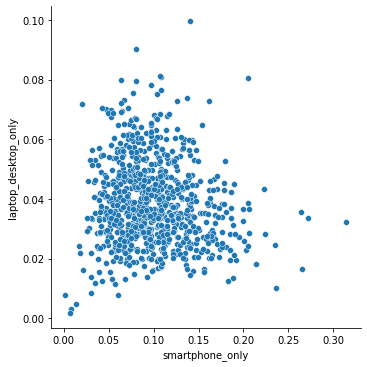

In [ ]:
sns.relplot(x= df_census_interwebs['smartphone_only'] , y=df_census_interwebs['laptop_desktop_only'])

IndexError: ignored

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
dff=df_census_interwebs.copy()

NameError: ignored

In [ ]:
dff = dff.drop(['deaths_involving_covid_19', 'date_as_of','start_date', 'end_date','urban_rural_code' , 'state' , 'fips','county_name' ,'non_covid_deaths','deaths_from_all_causes' ,'census_id', 'county_state_combo','county','Right_state', 'region', 'division'], axis=1)
train= dff
test = df_census_interwebs["deaths_involving_covid_19"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,test_size=0.2)

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
pred=regr.predict(X_test)

In [ ]:
pred

array([0.1248196 , 0.25415434, 0.11008325, 0.11761364, 0.10552638,
       0.14139376, 0.14143673, 0.09442408, 0.08498569, 0.10554156,
       0.06897559, 0.13572454, 0.0927685 , 0.09738944, 0.07173899,
       0.09948205, 0.10445971, 0.13788667, 0.1083794 , 0.08946827,
       0.08871724, 0.10051459, 0.12521668, 0.13105032, 0.06688674,
       0.10185823, 0.06635085, 0.10461032, 0.151401  , 0.11248911,
       0.11630721, 0.09420672, 0.09520087, 0.0989549 , 0.08239563,
       0.09990929, 0.11714428, 0.11826642, 0.12213144, 0.11011347,
       0.12699283, 0.07824639, 0.14547786, 0.0840221 , 0.09961988,
       0.11812511, 0.12445245, 0.10262621, 0.11813082, 0.15940464,
       0.11017782, 0.12283123, 0.12929253, 0.09613671, 0.0884409 ,
       0.05651956, 0.0959458 , 0.12347086, 0.10750972, 0.10827285,
       0.06139267, 0.11907215, 0.09150503, 0.11189405, 0.13843088,
       0.0920714 , 0.0578353 , 0.07487347, 0.1128523 , 0.14140996,
       0.13539777, 0.11153875, 0.12171482, 0.1152025 , 0.15233

In [ ]:
regr.score(X_test, y_test)

-1.798180127815118

In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~ state + county_name + urban_rural_code + non_covid_deat + deaths_from_all_causes + census_id + county_state_combo + region + division + total_households + one_or_more_computing_device + laptop_desktop + laptop_desktop_only + smartphone + smartphone_only + tablet_or_other_device + tablet_or_other_device_only + other_computer + other_computer_only + no_computer + internet_subscription + dialup + broadband_any + broadband_cellular_data + broadband_cellular_data_only + broadband_cfd + broadband_satellite + no_internet + income_low + income_low_dialup + income_low_broadband + income_low_no_internet + income_medium + income_medium_dialup + income_medium_broadband + income_medium_no_internet + income_high + income_high_dialup + income_high_broadband + income_high_no_internet' , data = df_census_interwebs).fit()

In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~  region  +laptop_desktop + dialup + laptop_desktop_only +  smartphone_only +  tablet_or_other_device_only+  broadband_satellite + broadband_cellular_data_only + broadband_cfd + income_low + income_medium ' , data = df_census_interwebs).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.234
Model:                                   OLS   Adj. R-squared:                  0.222
Method:                        Least Squares   F-statistic:                     19.13
Date:                       Wed, 11 Aug 2021   Prob (F-statistic):           2.18e-39
Time:                               07:49:55   Log-Likelihood:                 1513.0
No. Observations:                        827   AIC:                            -2998.
Df Residuals:                            813   BIC:                            -2932.
Df Model:                                 13                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.1185      0.025      4.822      0.000       0.070       0.167
region[T.Northeast]              0.0252      0.005      5.160      0.000       0.016       0.035
region[T.South]                 -0.0090      0.004     -2.418      0.016      -0.016      -0.002
region[T.West]                  -0.0177      0.005     -3.907      0.000      -0.027      -0.009
laptop_desktop                  -0.1155      0.044     -2.612      0.009      -0.202      -0.029
dialup                           0.6234      0.673      0.927      0.354      -0.697       1.944
laptop_desktop_only             -0.8325      0.126     -6.614      0.000      -1.080      -0.585
smartphone_only                  0.2985      0.063      4.716      0.000       0.174       0.423
tablet_or_other_device_only     -0.2795      0.302     -0.925      0.355      -0.873       0.314
broadband_satellite              0.0102      0.062      0.166      0.869      -0.111       0.132
broadband_cellular_data_only     0.0568      0.051      1.110      0.267      -0.044       0.157
broadband_cfd                    0.1241      0.040      3.125      0.002       0.046       0.202
income_low                       0.0829      0.042      1.969      0.049       0.000       0.165
income_medium                   -0.0430      0.027     -1.600      0.110      -0.096       0.010
==============================================================================
Omnibus:                       23.705   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.061
Skew:                           0.315   Prob(JB):                     2.97e-07
Kurtosis:                       3.690   Cond. No.                         792.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn import preprocessing
xdata= df_census_interwebs['deaths_involving_covid_19']
ydata= df_census_interwebs[["no_internet","income_low"]]
nydata=ydata.copy()
standard = preprocessing.scale(nydata)


In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~ income_low + no_internet + smartphone_only +region ' , data = df_census_interwebs).fit()

In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~ region + internet_subscription + income_low  + income_high + smartphone_only ' , data = df_census_interwebs).fit()

In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~ + region +no_in+ income_medium + income_low + smartphone_only' , data = df_census_interwebs).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.173
Model:                                   OLS   Adj. R-squared:                  0.166
Method:                        Least Squares   F-statistic:                     24.56
Date:                       Fri, 13 Aug 2021   Prob (F-statistic):           1.74e-30
Time:                               03:09:34   Log-Likelihood:                 1481.4
No. Observations:                        827   AIC:                            -2947.
Df Residuals:                            819   BIC:                            -2909.
Df Model:                                  7                                         
Covariance Type:                   nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0003      0.026      0.011      0.991      -0.050       0.051
region[T.Northeast]       0.0182      0.005      3.935      0.000       0.009       0.027
region[T.South]          -0.0040      0.004     -1.076      0.282      -0.011       0.003
region[T.West]           -0.0186      0.005     -4.101      0.000      -0.028      -0.010
internet_subscription    -0.0040      0.021     -0.184      0.854      -0.046       0.038
income_low                0.1576      0.053      2.962      0.003       0.053       0.262
income_high               0.1217      0.023      5.274      0.000       0.076       0.167
smartphone_only           0.4207      0.049      8.597      0.000       0.325       0.517
==============================================================================
Omnibus:                       34.952   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.596
Skew:                           0.402   Prob(JB):                     7.62e-11
Kurtosis:                       3.840   Cond. No.                         63.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_census_interwebs.dtypes

date_as_of                       object
start_date                       object
end_date                         object
state                            object
county_name                      object
fips                             object
urban_rural_code                 object
deaths_involving_covid_19       float64
non_covid_deaths                float64
deaths_from_all_causes            int64
census_id                        object
county_state_combo               object
county                           object
Right_state                      object
region                           object
division                         object
total_households                  int64
one_or_more_computing_device    float64
laptop_desktop                  float64
laptop_desktop_only             float64
smartphone                      float64
smartphone_only                 float64
tablet_or_other_device          float64
tablet_or_other_device_only     float64
other_computer                  float64


In [ ]:
model_incomemed = smf.ols(formula='deaths_involving_covid_19 ~ income_medium ' , data = df_census_interwebs).fit()

In [ ]:
model_incomemed = smf.ols(formula='deaths_involving_covid_19 ~  region + income_low +  no_internet +  smartphone_only   ' , data = df_census_interwebs).fit()

In [ ]:
model_incomemed.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.149
Model:                                   OLS   Adj. R-squared:                  0.143
Method:                        Least Squares   F-statistic:                     23.99
Date:                       Wed, 11 Aug 2021   Prob (F-statistic):           3.12e-26
Time:                               06:36:54   Log-Likelihood:                 1469.5
No. Observations:                        827   AIC:                            -2925.
Df Residuals:                            820   BIC:                            -2892.
Df Model:                                  6                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0793      0.005     15.817      0.000       0.069       0.089
region[T.Northeast]     0.0230      0.005      4.971      0.000       0.014       0.032
region[T.South]        -0.0019      0.004     -0.507      0.612      -0.009       0.005
region[T.West]         -0.0163      0.005     -3.556      0.000      -0.025      -0.007
income_low              0.0194      0.043      0.448      0.655      -0.066       0.105
no_internet            -0.0709      0.037     -1.941      0.053      -0.143       0.001
smartphone_only         0.3825      0.050      7.605      0.000       0.284       0.481
==============================================================================
Omnibus:                       49.105   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.774
Skew:                           0.505   Prob(JB):                     1.92e-15
Kurtosis:                       3.972   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

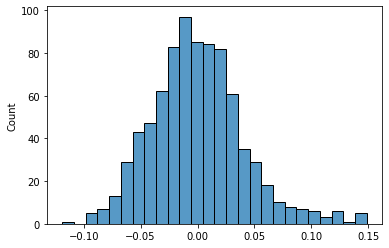

In [ ]:
sns.histplot(model_incomemed.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model_incomemed.resid)
mu,std

(4.698646416188691e-18, 0.04183566215952547)

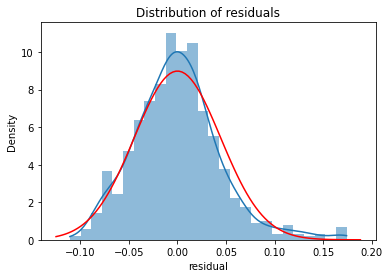

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_incomemed.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

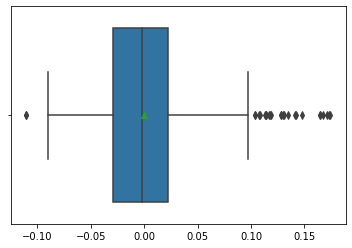

In [ ]:
#box plot
sns.boxplot(x=model_incomemed.resid, showmeans=True)

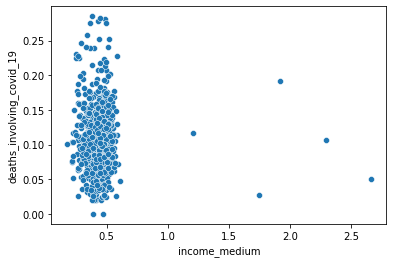

In [ ]:
#scatterplot
sns.scatterplot(x='income_medium', y='deaths_involving_covid_19', data=df_census_interwebs)

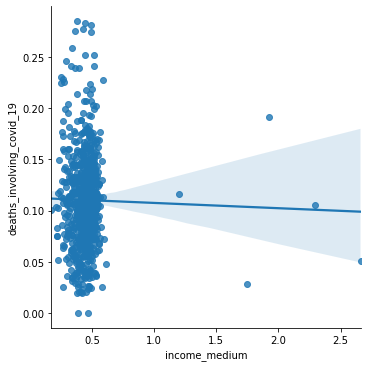

In [ ]:
#best fit line
sns.lmplot(x='income_medium',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
model_smartonly = smf.ols(formula='deaths_involving_covid_19 ~  smartphone_only ' , data = df_census_interwebs).fit()

In [ ]:
model_smartonly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.081
Model:                                   OLS   Adj. R-squared:                  0.080
Method:                        Least Squares   F-statistic:                     72.61
Date:                       Sat, 31 Jul 2021   Prob (F-statistic):           7.45e-17
Time:                               23:49:31   Log-Likelihood:                 1437.5
No. Observations:                        827   AIC:                            -2871.
Df Residuals:                            825   BIC:                            -2862.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0803      0.004     20.916      0.000       0.073       0.088
smartphone_only     0.3039      0.036      8.521      0.000       0.234       0.374
==============================================================================
Omnibus:                       67.639   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.461
Skew:                           0.597   Prob(JB):                     1.26e-23
Kurtosis:                       4.278   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model = smf.ols(formula='deaths_involving_covid_19 ~  income_low_no_internet ' , data = df_census_interwebs).fit()

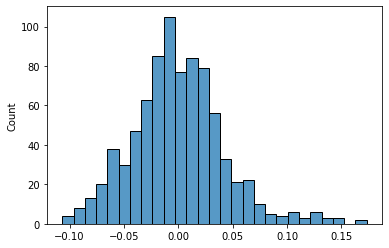

In [ ]:
sns.histplot(model_smartonly.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model_smartonly.resid)
mu,std

(5.275908690177588e-17, 0.042546602133693254)

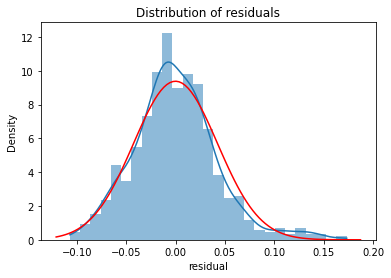

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_smartonly.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

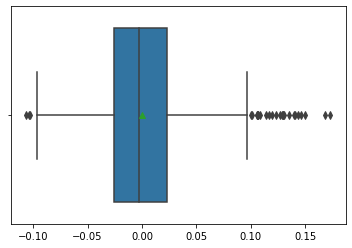

In [ ]:
#box plot
sns.boxplot(x=model_smartonly.resid, showmeans=True)

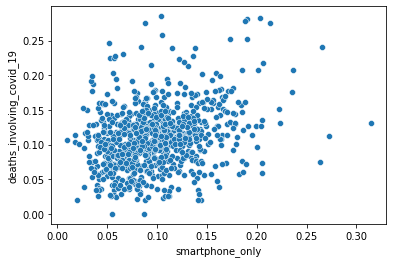

In [ ]:
#scatterplot
sns.scatterplot(x='smartphone_only', y='deaths_involving_covid_19', data=df_census_interwebs)

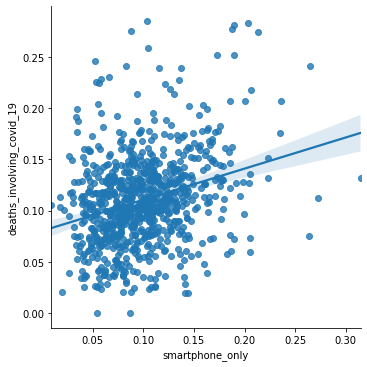

In [ ]:
#best fit line
sns.lmplot(x='smartphone_only',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
model_ldonly = smf.ols(formula='deaths_involving_covid_19 ~  laptop_desktop_only ' , data = df_census_interwebs).fit()

In [ ]:
model_ldonly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.040
Model:                                   OLS   Adj. R-squared:                  0.039
Method:                        Least Squares   F-statistic:                     34.32
Date:                       Sat, 31 Jul 2021   Prob (F-statistic):           6.74e-09
Time:                               23:55:59   Log-Likelihood:                 1419.5
No. Observations:                        827   AIC:                            -2835.
Df Residuals:                            825   BIC:                            -2826.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1353      0.005     30.058      0.000       0.126       0.144
laptop_desktop_only    -0.6409      0.109     -5.859      0.000      -0.856      -0.426
==============================================================================
Omnibus:                       60.573   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.686
Skew:                           0.570   Prob(JB):                     5.52e-20
Kurtosis:                       4.129   Cond. No.                         72.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

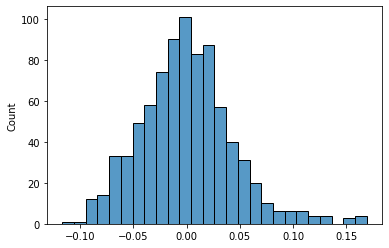

In [ ]:
sns.histplot(model_ldonly.resid)

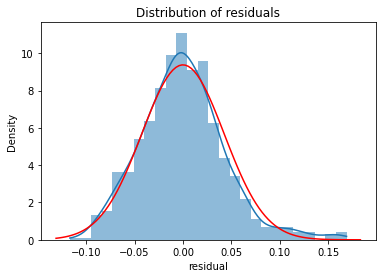

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_ldonly.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

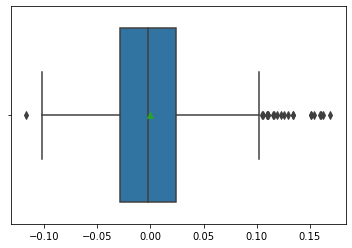

In [ ]:
#box plot
sns.boxplot(x=model_ldonly.resid, showmeans=True)

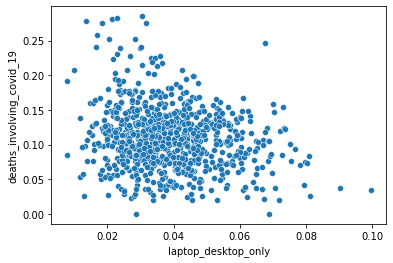

In [ ]:
#best fit line
sns.scatterplot(x='laptop_desktop_only',y='deaths_involving_covid_19', data=df_census_interwebs )

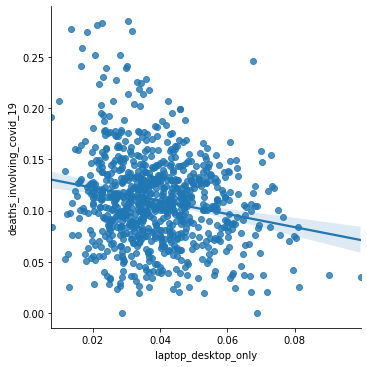

In [ ]:
#best fit line
sns.lmplot(x='laptop_desktop_only',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
model_bbs = smf.ols(formula='deaths_involving_covid_19 ~ broadband_satellite' , data = df_census_interwebs).fit()

In [ ]:
model_bbs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.006
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     5.132
Date:                       Sat, 31 Jul 2021   Prob (F-statistic):             0.0237
Time:                               23:59:57   Log-Likelihood:                 1405.2
No. Observations:                        827   AIC:                            -2806.
Df Residuals:                            825   BIC:                            -2797.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.1185      0.004     30.607      0.000       0.111       0.126
broadband_satellite    -0.1211      0.053     -2.265      0.024      -0.226      -0.016
==============================================================================
Omnibus:                       79.350   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.374
Skew:                           0.671   Prob(JB):                     3.62e-28
Kurtosis:                       4.367   Cond. No.                         34.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

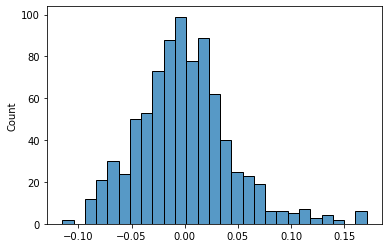

In [ ]:
sns.histplot(model_bbs.resid)

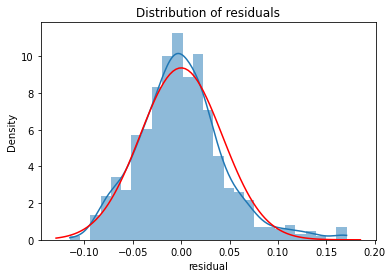

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_bbs.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

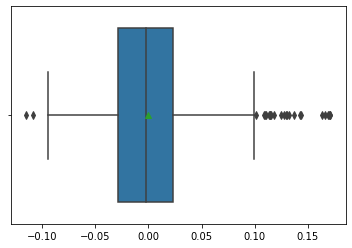

In [ ]:
#box plot
sns.boxplot(x=model_bbs.resid, showmeans=True)

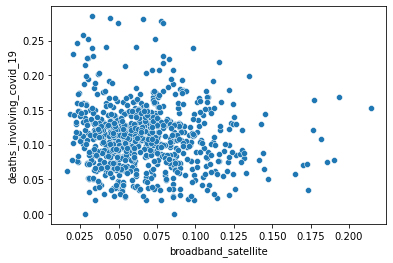

In [ ]:
#best fit line
sns.scatterplot(x='broadband_satellite',y='deaths_involving_covid_19', data=df_census_interwebs )

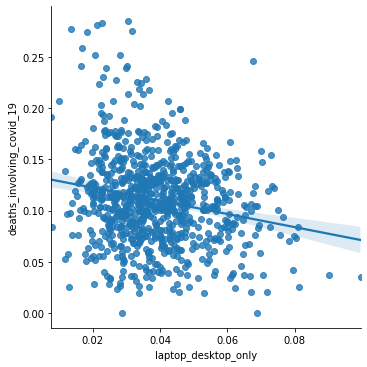

In [ ]:
#best fit line
sns.lmplot(x='laptop_desktop_only',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.036
Model:                                   OLS   Adj. R-squared:                  0.035
Method:                        Least Squares   F-statistic:                     30.77
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):           3.92e-08
Time:                               20:25:37   Log-Likelihood:                 1417.8
No. Observations:                        827   AIC:                            -2832.
Df Residuals:                            825   BIC:                            -2822.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.0961      0.003     31.928      0.000       0.090       0.102
income_low_no_internet     0.2840      0.051      5.547      0.000       0.183       0.384
==============================================================================
Omnibus:                       65.860   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.347
Skew:                           0.583   Prob(JB):                     3.62e-23
Kurtosis:                       4.281   Cond. No.                         33.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

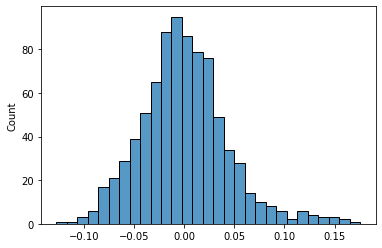

In [ ]:
#histogram of residuals
sns.histplot(model.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model.resid)
mu,std

(-1.1008257317927791e-17, 0.043574353692744844)

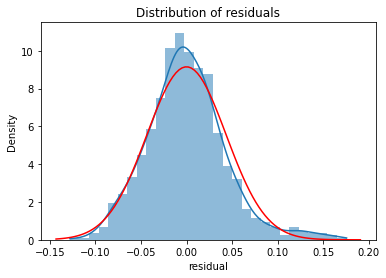

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

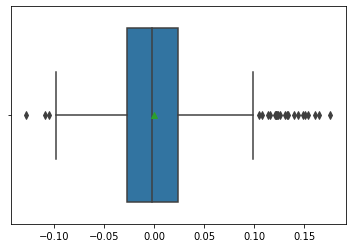

In [ ]:
#box plot
sns.boxplot(x=model.resid, showmeans=True)

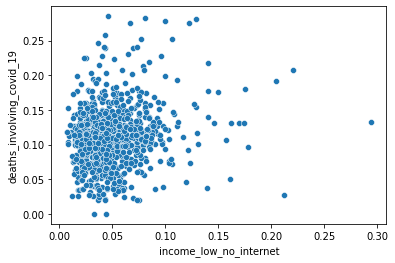

In [ ]:
#scatterplot
sns.scatterplot(x='income_low_no_internet', y='deaths_involving_covid_19', data=df_census_interwebs)


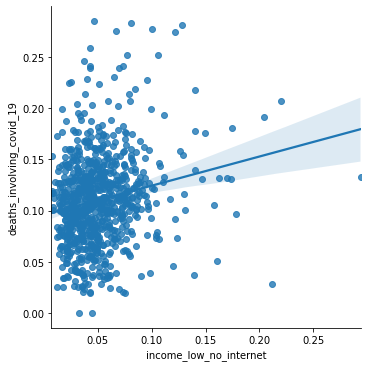

In [ ]:
#best fit line
sns.lmplot(x='income_low_no_internet',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
model_smartcell = smf.ols (formula='deaths_involving_covid_19 ~  smartphone_only + broadband_cellular_data_only  ' , data = df_census_interwebs).fit()

In [ ]:
model_smartcell.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.087
Model:                                   OLS   Adj. R-squared:                  0.084
Method:                        Least Squares   F-statistic:                     39.07
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):           6.17e-17
Time:                               20:34:16   Log-Likelihood:                 1440.1
No. Observations:                        827   AIC:                            -2874.
Df Residuals:                            824   BIC:                            -2860.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.0855      0.004     19.167      0.000       0.077       0.094
smartphone_only                  0.3683      0.045      8.097      0.000       0.279       0.458
broadband_cellular_data_only    -0.0957      0.042     -2.271      0.023      -0.178      -0.013
==============================================================================
Omnibus:                       68.874   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              109.244
Skew:                           0.600   Prob(JB):                     1.90e-24
Kurtosis:                       4.316   Cond. No.                         38.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**It looks like 30% of people died because Covid had smartphones, but didn't have cellular. We could possibly argue that if smarphones are so well spread, then the country should be focusing on making cellular as well spread too.**

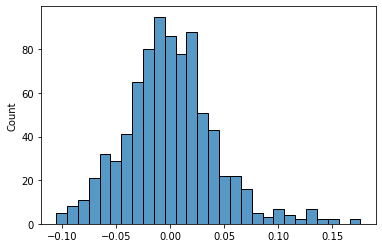

In [ ]:
#histogram of residuals
sns.histplot(model_smartcell.resid)

In [ ]:
#simple linear regression no_internet
model_nointernet = smf.ols(formula='deaths_involving_covid_19 ~  no_internet  ' , data = df_census_interwebs).fit()

In [ ]:
model_nointernet.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.024
Model:                                   OLS   Adj. R-squared:                  0.023
Method:                        Least Squares   F-statistic:                     20.10
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):           8.40e-06
Time:                               03:01:45   Log-Likelihood:                 1412.6
No. Observations:                        827   AIC:                            -2821.
Df Residuals:                            825   BIC:                            -2812.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0939      0.004     23.404      0.000       0.086       0.102
no_internet     0.1206      0.027      4.483      0.000       0.068       0.173
==============================================================================
Omnibus:                       73.698   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.187
Skew:                           0.636   Prob(JB):                     5.89e-26
Kurtosis:                       4.325   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

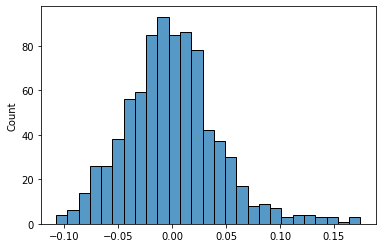

In [ ]:
#histogram of residuals
sns.histplot(model_nointernet.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model_nointernet.resid)
mu,std

(6.578104982664168e-18, 0.04384858459785981)

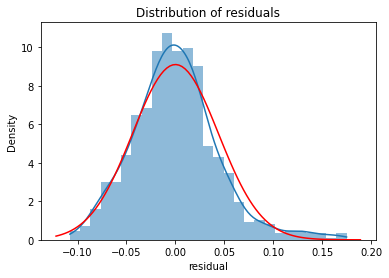

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_nointernet.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="red", ax=ax)
plt.show()

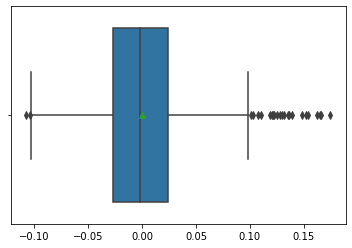

In [ ]:
#box plot
sns.boxplot(x=model_nointernet.resid, showmeans=True)

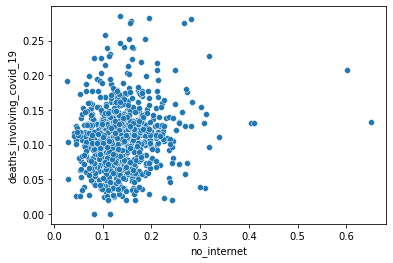

In [ ]:
#scatterplot
sns.scatterplot(x='no_internet', y='deaths_involving_covid_19', data=df_census_interwebs)

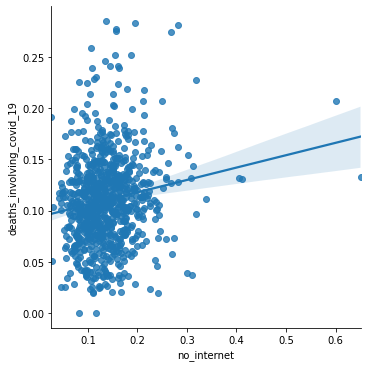

In [ ]:
#best fit line
sns.lmplot(x='no_internet',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
#simple linear regression no_computer
model = smf.ols(formula='deaths_involving_covid_19 ~  no_computer  ' , data = df_census_interwebs).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.002
Model:                                   OLS   Adj. R-squared:                  0.001
Method:                        Least Squares   F-statistic:                     1.569
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):              0.211
Time:                               20:40:28   Log-Likelihood:                 1403.4
No. Observations:                        827   AIC:                            -2803.
Df Residuals:                            825   BIC:                            -2793.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1123      0.002     52.406      0.000       0.108       0.117
no_computer -1236.2190    986.990     -1.253      0.211   -3173.526     701.088
==============================================================================
Omnibus:                       79.958   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.519
Skew:                           0.674   Prob(JB):                     2.04e-28
Kurtosis:                       4.372   Cond. No.                     6.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

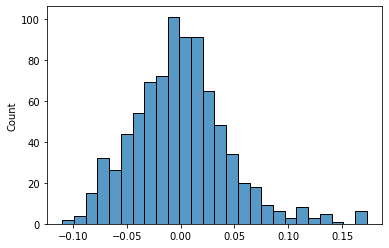

In [ ]:
#histogram of residuals
sns.histplot(model.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model.resid)
mu,std

(-3.5575465722571524e-17, 0.044337330801334084)

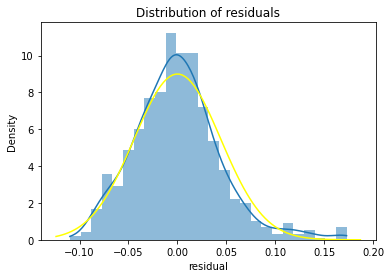

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="yellow", ax=ax)
plt.show()

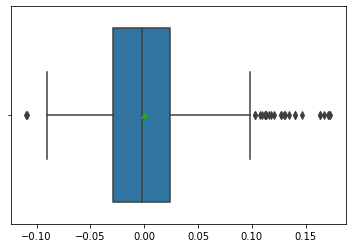

In [ ]:
#box plot
sns.boxplot(x=model.resid, showmeans=True)

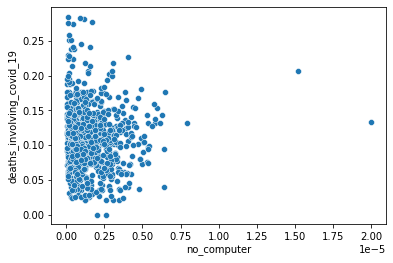

In [ ]:
sns.scatterplot(x='no_computer',y='deaths_involving_covid_19', data=df_census_interwebs )

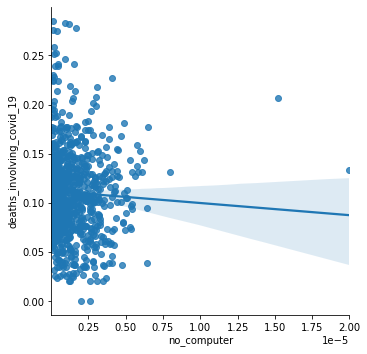

In [ ]:
#best fit line
sns.lmplot(x='no_computer',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
#simple linear regression income_low
model_incomelow = smf.ols(formula='deaths_involving_covid_19 ~  income_low  ' , data = df_census_interwebs).fit()

In [ ]:
model_incomelow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.023
Model:                                   OLS   Adj. R-squared:                  0.021
Method:                        Least Squares   F-statistic:                     19.00
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):           1.47e-05
Time:                               20:41:12   Log-Likelihood:                 1412.0
No. Observations:                        827   AIC:                            -2820.
Df Residuals:                            825   BIC:                            -2811.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0946      0.004     23.875      0.000       0.087       0.102
income_low     0.1116      0.026      4.359      0.000       0.061       0.162
==============================================================================
Omnibus:                       71.820   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.555
Skew:                           0.612   Prob(JB):                     4.90e-26
Kurtosis:                       4.372   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

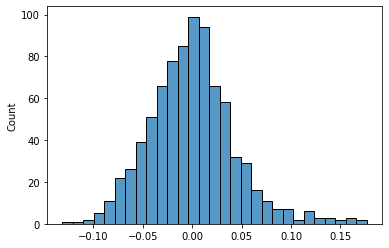

In [ ]:
sns.histplot(model_incomelow.resid)

In [ ]:
#mean and standard deviation od the best-fit normal distribution
mu, std=stats.norm.fit(model_incomelow.resid)
mu,std

(2.0808291271692777e-17, 0.043877004938252306)

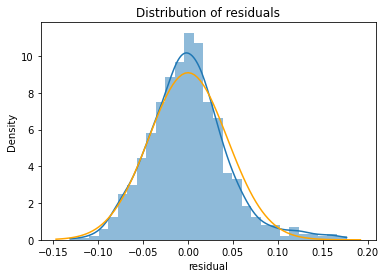

In [ ]:
#kernal density plot
fig, ax = plt.subplots()
#plot resdiual
sns.histplot(x=model_incomelow.resid, ax=ax, stat='density', linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

#plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

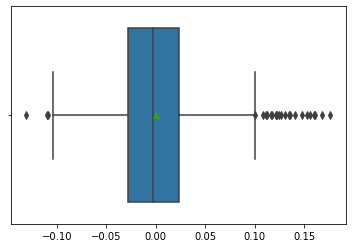

In [ ]:
#box plot
sns.boxplot(x=model_incomelow.resid, showmeans=True)

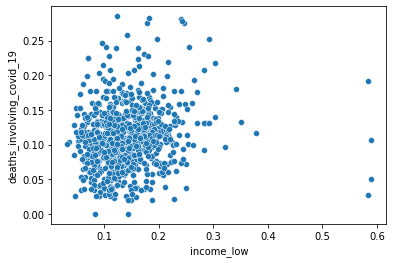

In [ ]:
#scatterplot
sns.scatterplot(x='income_low',y='deaths_involving_covid_19', data=df_census_interwebs )

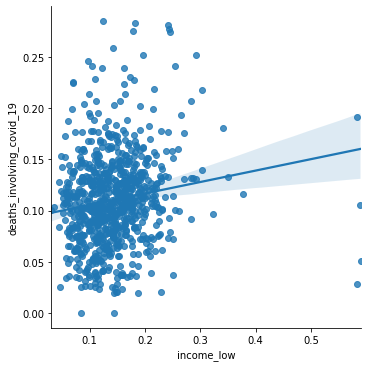

In [ ]:
sns.lmplot(x='income_low',y='deaths_involving_covid_19', data=df_census_interwebs )

In [ ]:
#multiple regression
model = smf.ols(formula='deaths_involving_covid_19 ~  no_internet + income_low ' , data = df_census_interwebs).fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     deaths_involving_covid_19   R-squared:                       0.030
Model:                                   OLS   Adj. R-squared:                  0.028
Method:                        Least Squares   F-statistic:                     12.88
Date:                       Wed, 28 Jul 2021   Prob (F-statistic):           3.09e-06
Time:                               20:42:56   Log-Likelihood:                 1415.4
No. Observations:                        827   AIC:                            -2825.
Df Residuals:                            824   BIC:                            -2811.
Df Model:                                  2                                         
Covariance Type:                   nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0892      0.004     19.960      0.000       0.080       0.098
no_internet     0.0814      0.032      2.576      0.010       0.019       0.143
income_low      0.0708      0.030      2.358      0.019       0.012       0.130
==============================================================================
Omnibus:                       70.529   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.345
Skew:                           0.616   Prob(JB):                     1.09e-24
Kurtosis:                       4.297   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df=df_census_interwebs

In [ ]:
df[["urban_rural_code", "deaths_involving_covid_19", "deaths_from_all_causes", "non_covid_deaths"]].corr()

,deaths_involving_covid_19,deaths_from_all_causes,non_covid_deaths
deaths_involving_covid_19,1.000000,0.272309,-1.000000
deaths_from_all_causes,0.272309,1.000000,-0.272309
non_covid_deaths,-1.000000,-0.272309,1.000000


In [ ]:
df[["urban_rural_code", "deaths_involving_covid_19", "deaths_from_all_causes", "non_covid_deaths"]].corr()

,deaths_involving_covid_19,deaths_from_all_causes,non_covid_deaths
deaths_involving_covid_19,1.000000,0.272309,-1.000000
deaths_from_all_causes,0.272309,1.000000,-0.272309
non_covid_deaths,-1.000000,-0.272309,1.000000


In [ ]:
binned = pd.qcut(df['deaths_involving_covid_19'], 5)

df_bin = df.groupby('binned')['deaths_involving_covid_19'].count()

print(df_bin.head())

binned
(-0.001, 0.075]    166
(0.075, 0.0999]    165
(0.0999, 0.118]    165
(0.118, 0.141]     165
(0.141, 0.285]     166
Name: deaths_involving_covid_19, dtype: int64


In [ ]:
Urbancorr =pd.crosstab(index=df["urban_rural_code"],columns=df["deaths_involving_covid_19"],normalize=("index"))*100
Urbancorr

deaths_involving_covid_19,0.000000,0.020214,0.020270,0.020447,0.020660,0.021186,0.023445,0.023802,0.024678,0.025516,0.025618,0.025667,0.025936,0.026643,0.026923,0.028120,0.028219,0.028674,0.029282,0.031407,0.033007,0.034628,0.034722,0.034762,0.034850,0.035129,0.035385,0.035445,0.036021,0.036036,0.036298,0.036509,0.036912,0.037120,0.037221,0.037331,0.037530,0.037785,0.039293,0.039370,...,0.187882,0.188865,0.188956,0.191459,0.192253,0.193189,0.194978,0.195263,0.199001,0.199269,0.202052,0.203540,0.203672,0.207071,0.207105,0.207298,0.213567,0.214238,0.218174,0.218665,0.223845,0.224402,0.225174,0.227411,0.228170,0.230125,0.238841,0.238867,0.240865,0.241196,0.246042,0.251785,0.251998,0.258629,0.274775,0.275508,0.277646,0.281605,0.283209,0.284961
urban_rural_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Large central metro,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,1.470588,1.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470588,1.470588,0.000000,0.000000,1.470588,0.000000,1.470588,0.000000,1.470588,0.000000,1.470588,0.000000,0.000000,0.000000,1.470588
Large fringe metro,0.00000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.440529,0.000000,0.0,0.000000,0.000000,0.440529,0.000000,...,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.440529,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Medium metro,0.00000,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.456621,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.456621,0.000000,0.456621,0.000000,0.000000,0.456621,0.000000,0.456621,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.456621,0.000000,0.000000,0.456621,0.456621,0.000000
Micropolitan,1.73913,0.000000,0.000000,0.869565,0.869565,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.869565,0.000000,0.869565,0.000000,0.869565,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.0,0.869565,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Noncore,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
pd.crosstab(index=df["urban_rural_code"],columns=df["non_covid_deaths"],normalize=("index"))*100

non_covid_deaths,0.715039,0.716791,0.718395,0.722354,0.724492,0.725225,0.741371,0.748002,0.748215,0.753958,0.758804,0.759135,0.761133,0.761159,0.769875,0.771830,0.772589,0.774826,0.775598,0.776155,0.781335,0.781826,0.785762,0.786433,0.792702,0.792895,0.792929,0.796328,0.796460,0.797948,0.800731,0.800999,0.804737,0.805022,0.806811,0.807747,0.808541,0.811044,0.811135,0.812118,...,0.960630,0.960707,0.962215,0.962470,0.962669,0.962779,0.962880,0.963088,0.963491,0.963702,0.963964,0.963979,0.964555,0.964615,0.964871,0.965150,0.965238,0.965278,0.965372,0.966993,0.968593,0.970718,0.971326,0.971781,0.971880,0.973077,0.973357,0.974064,0.974333,0.974382,0.974484,0.975322,0.976198,0.976555,0.978814,0.979340,0.979553,0.979730,0.979786,1.000000
urban_rural_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Large central metro,1.470588,0.000000,0.000000,0.000000,1.470588,0.000000,1.470588,0.000000,1.470588,0.000000,1.470588,0.000000,0.000000,1.470588,1.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470588,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.470588,1.470588,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
Large fringe metro,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.440529,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.440529,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,...,0.000000,0.440529,0.000000,0.000000,0.0,0.000000,0.440529,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.000000,0.440529,0.000000,0.000000,0.000000,0.440529,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.440529,0.00000
Medium metro,0.000000,0.456621,0.456621,0.000000,0.000000,0.456621,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.456621,0.000000,0.456621,0.000000,0.000000,0.456621,0.000000,0.456621,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.000000,0.000000,0.000000,0.456621,0.456621,0.000000,0.000000,0.000000,0.456621,0.000000,0.00000
Micropolitan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.869565,0.0,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.869565,0.000000,0.869565,0.000000,0.869565,0.869565,0.000000,0.000000,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.869565,0.000000,0.000000,0.000000,0.000000,0.869565,0.869565,0.869565,0.000000,0.000000,1.73913
Noncore,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
pd.crosstab(index=df["region"],columns=df["deaths_involving_covid_19"],normalize=("index"))*100

deaths_involving_covid_19,0.000000,0.020214,0.020270,0.020447,0.020660,0.021186,0.023445,0.023802,0.024678,0.025516,0.025618,0.025667,0.025936,0.026643,0.026923,0.028120,0.028219,0.028674,0.029282,0.031407,0.033007,0.034628,0.034722,0.034762,0.034850,0.035129,0.035385,0.035445,0.036021,0.036036,0.036298,0.036509,0.036912,0.037120,0.037221,0.037331,0.037530,0.037785,0.039293,0.039370,...,0.187882,0.188865,0.188956,0.191459,0.192253,0.193189,0.194978,0.195263,0.199001,0.199269,0.202052,0.203540,0.203672,0.207071,0.207105,0.207298,0.213567,0.214238,0.218174,0.218665,0.223845,0.224402,0.225174,0.227411,0.228170,0.230125,0.238841,0.238867,0.240865,0.241196,0.246042,0.251785,0.251998,0.258629,0.274775,0.275508,0.277646,0.281605,0.283209,0.284961
region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.505051,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.505051,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.505051,0.00000,0.505051,0.00000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000
Northeast,0.000000,0.00000,0.00000,0.729927,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.00000,0.000000,0.729927,0.729927,0.729927,0.729927,0.000000,0.00000,0.000000,...,0.000000,0.729927,0.000000,0.00000,0.000000,0.00000,0.729927,0.000000,0.00000,0.729927,0.00000,0.000000,0.729927,0.000000,0.00000,0.00000,0.00000,0.729927,0.00000,0.000000,0.00000,0.729927,0.729927,0.000000,0.729927,0.729927,0.729927,0.729927,0.00000,0.729927,0.729927,0.729927,0.00000,0.729927,0.00000,0.729927,0.000000,0.00000,0.00000,0.729927
South,0.000000,0.28169,0.28169,0.000000,0.000000,0.000000,0.28169,0.000000,0.000000,0.28169,0.000000,0.000000,0.000000,0.28169,0.000000,0.000000,0.28169,0.000000,0.000000,0.000000,0.28169,0.000000,0.000000,0.000000,0.28169,0.000000,0.000000,0.28169,0.28169,0.000000,0.28169,0.28169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.28169,0.000000,...,0.000000,0.000000,0.000000,0.28169,0.000000,0.28169,0.000000,0.000000,0.28169,0.000000,0.28169,0.000000,0.000000,0.000000,0.28169,0.28169,0.28169,0.000000,0.28169,0.000000,0.28169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.28169,0.000000,0.000000,0.000000,0.28169,0.000000,0.28169,0.000000,0.000000,0.28169,0.28169,0.000000
West,1.459854,0.00000,0.00000,0.000000,0.729927,0.729927,0.00000,0.729927,0.729927,0.00000,0.729927,0.729927,0.729927,0.00000,0.729927,0.000000,0.00000,0.729927,0.729927,0.729927,0.00000,0.729927,0.729927,0.729927,0.00000,0.729927,0.000000,0.00000,0.00000,0.729927,0.00000,0.00000,0.729927,0.000000,0.000000,0.000000,0.000000,0.729927,0.00000,0.729927,...,0.729927,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.729927,0.00000,0.000000,0.00000,0.729927,0.000000,0.729927,0.00000,0.00000,0.00000,0.000000,0.00000,0.729927,0.00000,0.000000,0.000000,0.729927,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.729927,0.00000,0.00000,0.000000


In [ ]:
from matplotlib import pyplot

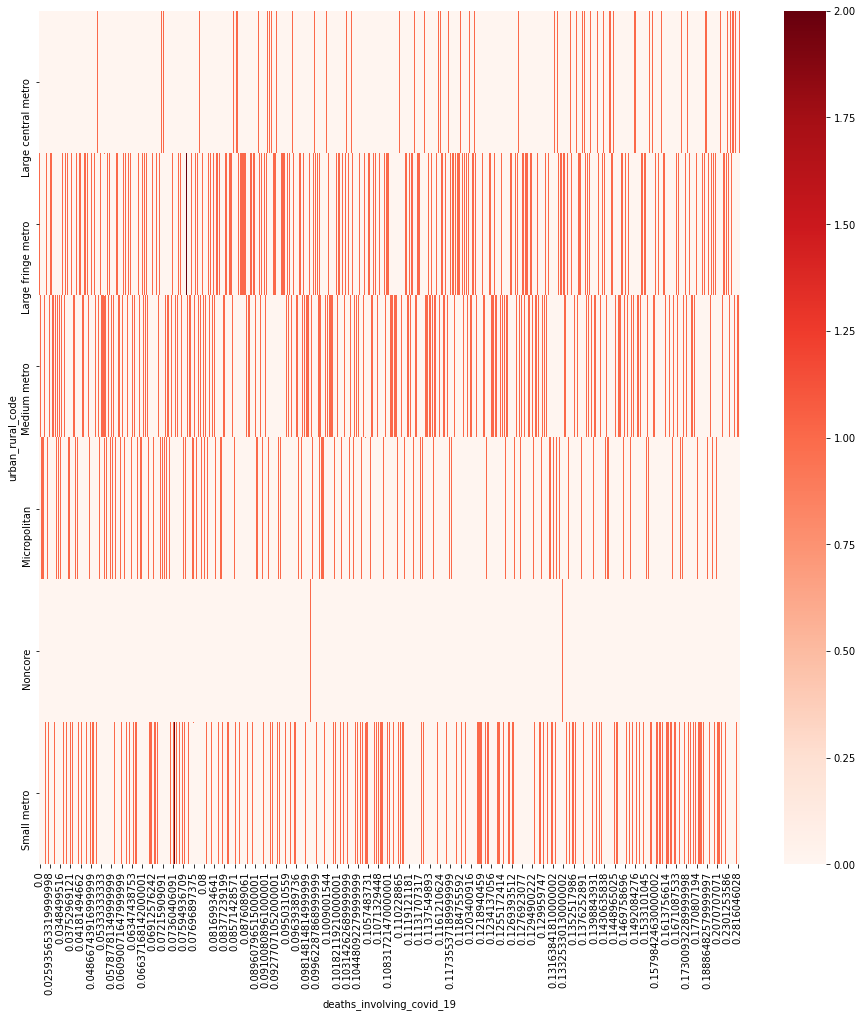

In [ ]:
a4_dims = (15.7, 15.7)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(Urbancorr,ax=ax, cmap="Reds")
plt.show()

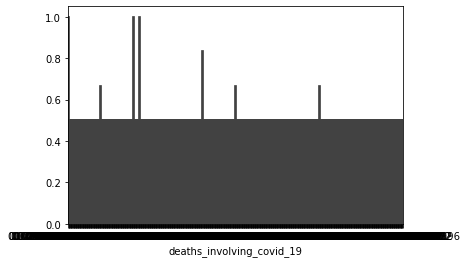

In [ ]:
sns.barplot(data=Urbancorr)

In [ ]:
sns.countplot(data=Urbancorr[""])